# 因为Access_key不能传到github上，将前面一段的代码放在的数据文件夹中的head.txt中了，所以直接从users和github_log表开始

In [10]:
users = DataFrame(o.get_table('ods_github_users'))
print(users.dtypes)

github_log = DataFrame(o.get_table('ods_github_log'))
print(github_log.dtypes)

odps.Schema {
  login                     string        
  created_at                date          
  database_id               int64         
  location                  string        
  company                   string        
  bio                       string        
  is_employee               boolean       
  email                     string        
  infoname                  string        
  followers                 string        
  following                 string        
  time                      date          
  name                      string        
  lastupdatedat             date          
  nextupdateat              date          
}

odps.Schema {
  id                                                                          string                  
  type                                                                        string                  
  action                                                                      string                  
  actor_id     

## 查看两个表的前5行的信息

In [72]:
name = []
message = []
botjc = []
botlc = []
humanjc = []
humanlc = []

In [73]:
with o.execute_sql('select distinct push_commits_name,push_commits_message from ods_github_log where repo_name = \'dependabot/elixir-security-advisories\' and pt == \'20210701\'').open_reader(tunnel = True) as reader:
    for record in reader:
        name.append(record[0])
        message.append(record[1])

In [74]:
name = [x for x in name if x]
name

[['dependabot[bot]', 'Grey Baker'], ['dependabot[bot]', 'Grey Baker']]

In [75]:
message = [x for x in message if x]
message

[['Bump rake from 13.0.3 to 13.0.4\n\nBumps [rake](https://github.com/ruby/rake) from 13.0.3 to 13.0.4.\n- [Release notes](https://github.com/ruby/rake/releases)\n- [Changelog](https://github.com/ruby/rake/blob/master/History.rdoc)\n- [Commits](https://github.com/ruby/rake/compare/v13.0.3...v13.0.4)\n\n---\nupdated-dependencies:\n- dependency-name: rake\n  dependency-type: direct:production\n  update-type: version-update:semver-patch\n...\n\nSigned-off-by: dependabot[bot] <support@github.com>',
  'Merge pull request #29 from dependabot/dependabot/bundler/rake-13.0.4\n\nBump rake from 13.0.3 to 13.0.4'],
 ['Bump rake from 13.0.4 to 13.0.6\n\nBumps [rake](https://github.com/ruby/rake) from 13.0.4 to 13.0.6.\n- [Release notes](https://github.com/ruby/rake/releases)\n- [Changelog](https://github.com/ruby/rake/blob/master/History.rdoc)\n- [Commits](https://github.com/ruby/rake/compare/v13.0.4...v13.0.6)\n\n---\nupdated-dependencies:\n- dependency-name: rake\n  dependency-type: direct:produc

In [76]:
b1 = message[0][0]
b2 = message[1][0]

In [77]:
b1

'Bump rake from 13.0.3 to 13.0.4\n\nBumps [rake](https://github.com/ruby/rake) from 13.0.3 to 13.0.4.\n- [Release notes](https://github.com/ruby/rake/releases)\n- [Changelog](https://github.com/ruby/rake/blob/master/History.rdoc)\n- [Commits](https://github.com/ruby/rake/compare/v13.0.3...v13.0.4)\n\n---\nupdated-dependencies:\n- dependency-name: rake\n  dependency-type: direct:production\n  update-type: version-update:semver-patch\n...\n\nSigned-off-by: dependabot[bot] <support@github.com>'

In [78]:
b2

'Bump rake from 13.0.4 to 13.0.6\n\nBumps [rake](https://github.com/ruby/rake) from 13.0.4 to 13.0.6.\n- [Release notes](https://github.com/ruby/rake/releases)\n- [Changelog](https://github.com/ruby/rake/blob/master/History.rdoc)\n- [Commits](https://github.com/ruby/rake/compare/v13.0.4...v13.0.6)\n\n---\nupdated-dependencies:\n- dependency-name: rake\n  dependency-type: direct:production\n  update-type: version-update:semver-patch\n...\n\nSigned-off-by: dependabot[bot] <support@github.com>'

In [11]:
def jeccard(sen1,sen2):
    set1 = set(sen1.split(" "))
    set2 = set(sen2.split(" "))
    unionset = set1 | set2
    disset = set1 & set2
    return (1 - len(disset)/len(unionset))

In [12]:
import Levenshtein

def levendis(sen1,sen2):
    return Levenshtein.distance(sen1,sen2)/max(len(sen1),len(sen2))

In [81]:
botjc.append(jeccard(b1,b2))
botlc.append(levendis(b1,b2))

In [82]:
b1 = message[0][1]
b2 = message[1][1]

botjc.append(jeccard(b1,b2))
botlc.append(levendis(b1,b2))

In [83]:
botjc

[0.31999999999999995, 0.46153846153846156]

In [84]:
botlc

[0.0125, 0.049019607843137254]

In [85]:
name2 = []
message2 = []

In [86]:
with o.execute_sql('select distinct push_commits_name,push_commits_message from ods_github_log where repo_name = \'dependabot/fetch-metadata\' and pt == \'20210801\'').open_reader(tunnel = True) as reader:
    for record in reader:
        name2.append(record[0])
        message2.append(record[1])

In [87]:
name2 = [x for x in name2 if x]
message2 = [x for x in message2 if x]


In [88]:
name2

[['Barry Gordon'],
 ['Barry Gordon', 'Barry Gordon'],
 ['dependabot[bot]'],
 ['dependabot[bot]', 'Barry Gordon', 'github-actions[bot]'],
 ['dependabot[bot]',
  'dependabot[bot]',
  'github-actions[bot]',
  'github-actions[bot]',
  'dependabot[bot]'],
 ['dependabot[bot]',
  'dependabot[bot]',
  'github-actions[bot]',
  'github-actions[bot]',
  'dependabot[bot]'],
 ['dependabot[bot]',
  'dependabot[bot]',
  'github-actions[bot]',
  'github-actions[bot]',
  'dependabot[bot]',
  'github-actions[bot]',
  'dependabot[bot]'],
 ['dependabot[bot]',
  'dependabot[bot]',
  'github-actions[bot]',
  'github-actions[bot]',
  'dependabot[bot]',
  'github-actions[bot]',
  'dependabot[bot]'],
 ['dependabot[bot]', 'github-actions[bot]'],
 ['dependabot[bot]', 'github-actions[bot]'],
 ['dependabot[bot]', 'github-actions[bot]'],
 ['dependabot[bot]', 'github-actions[bot]'],
 ['dependabot[bot]', 'github-actions[bot]'],
 ['dependabot[bot]', 'github-actions[bot]'],
 ['dependabot[bot]', 'github-actions[bot]'],


In [89]:
bot1m = []
bot2m = []

In [90]:
for i in range(len(name2)):
    for j in range(len(name2[i])):
        if(name2[i][j]=='dependabot[bot]'):
            bot1m.append(message2[i][j])
        if(name2[i][j]=='github-actions[bot]'):
            bot2m.append(message2[i][j])

In [91]:
for i in range(len(bot1m)):
    for j in range(i+1,len(bot1m)):
        sen1 = bot1m[i]
        sen2 = bot1m[j]
        botjc.append(jeccard(sen1,sen2))
        botlc.append(levendis(sen1,sen2))  

In [106]:
for i in range(len(bot2m)):
    for j in range(i+1,len(bot2m)):
        sen1 = bot2m[i]
        sen2 = bot2m[j]
        botjc.append(jeccard(sen1,sen2))
        botlc.append(levendis(sen1,sen2)) 

In [111]:
name3 = []
message3 = []

In [112]:
with o.execute_sql('select distinct push_commits_name,push_commits_message from ods_github_log where repo_name = \'Chia-Network/chia-blockchain\' and pt == \'20211101\'').open_reader(tunnel = True) as reader:
    for record in reader:
        name3.append(record[0])
        message3.append(record[1])

In [121]:
for i in range(len(message3[-2])):
    for j in range(i+1,len(message3[-2])):
        sen1 = message3[-2][i]
        sen2 = message3[-2][j]
        humanjc.append(jeccard(sen1,sen2))
        humanlc.append(levendis(sen1,sen2))  

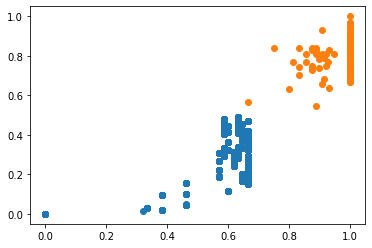

In [123]:
import matplotlib.pyplot as plt
plt.scatter(botjc,botlc)
plt.scatter(humanjc,humanlc)
plt.show()

## 应该计算的是每个机器人、人类的平均的Levenshtein-distance和jeccard-distance值，现在只是粗略统计，采用的是一到两个机器人、人类的多个Ld,jd值，所以图会略有偏差。
## 后续可以继续改进

In [5]:
choosebot = []
choosecm = []

In [6]:
with o.execute_sql('select distinct push_commits_name,push_commits_message from ods_github_log where pt >= \'20210101\' and pt <= \'20211201\' limit 1000000').open_reader(tunnel = True) as reader:
    for record in reader:
        choosebot.append(record[0])
        choosecm.append(record[1])

In [7]:
len(choosebot)

1000000

In [7]:
botlist = []
botcomm = []
humanli = []
humancomm = []

In [8]:
import re

for i in range(len(choosebot)):
    for j in range(len(choosebot[i])):
        if(re.search('bot',str(choosebot[i][j]))):
            botlist.append(choosebot[i][j])
            botcomm.append(choosecm[i][j])
        else:
            humanli.append(choosebot[i][j])
            humancomm.append(choosecm[i][j])

In [9]:
boli = set(botlist)
huli = set(humanli)

In [10]:
bojdis = []
boldis = []
countli = []
maxdis = 0

for bot in boli:
    jcdis = 0.0
    lcdis = 0.0
    count = 0
    mess = []
    for i in range(len(botlist)):
        if(bot == str(botlist[i])):
            mess.append(botcomm[i])

    if(len(mess)>10):
        for m in range(len(mess)):
            for n in range(m+1,len(mess)):
                sen1 = mess[m]
                sen2 = mess[n]
                if(sen1 and sen2):
                    count += 1
                    jcdis += jeccard(sen1,sen2)
                    lcdis += levendis(sen1,sen2)
        if(jcdis > maxdis):
            maxdis = jcdis
            maxid = bot
        bojdis.append(jcdis/count)
        boldis.append(lcdis/count)

    countli.append(len(mess))
    

In [11]:
hujdis = []
huldis = []
countli2 = []

for human in huli:
    jcdis = 0.0
    lcdis = 0.0
    count = 0
    mess = []
    for i in range(int(len(humanli)/100)):
        if(human == str(humanli[i])):
            mess.append(humancomm[i])

    if(len(mess)>10):
        for m in range(len(mess)):
            for n in range(m+1,len(mess)):
                sen1 = mess[m]
                sen2 = mess[n]
                if(sen1 and sen2):
                    count += 1
                    jcdis += jeccard(sen1,sen2)
                    lcdis += levendis(sen1,sen2)
    
        hujdis.append(jcdis/count)
        huldis.append(lcdis/count)

    countli2.append(len(mess))
    

In [29]:
len(boli)

1024

In [30]:
import pandas as pd

data = {'jeccard_d' : bojdis , 'lev_d' : boldis , 'type' : [1 for i in range(len(boldis))]}

df = pd.DataFrame(data)


In [31]:
data2 = {'jeccard_d' : hujdis , 'lev_d' : huldis , 'type' : [0 for i in range(len(huldis))]}

df2 = pd.DataFrame(data2)

df = df.append(df2)

df

,jeccard_d,lev_d,type
0,0.837642,0.714678,1
1,0.868773,0.751657,1
2,0.400000,0.120745,1
3,0.898480,0.719943,1
4,0.656785,0.424225,1
...,...,...,...
132,0.333333,0.515904,0
133,0.769092,0.317105,0
134,0.794367,0.292801,0
135,0.917949,0.840771,0


In [32]:
df.to_csv('train.csv',index = False)

In [16]:
maxid

'dependabot[bot]'

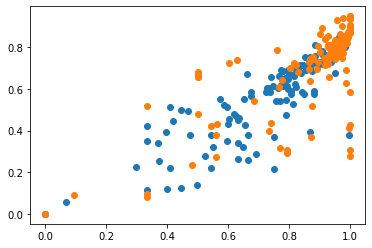

In [18]:
import matplotlib.pyplot as plt
plt.scatter(bojdis,boldis) 
plt.scatter(hujdis,huldis)
plt.show()

## 临界点的寻找：

In [1]:
#1 : bot  0: human

import pandas as pd

df = pd.read_csv('train.csv')

dfb = df.head(132)

dfb

,jeccard_d,lev_d,type
0,0.837642,0.714678,1
1,0.868773,0.751657,1
2,0.400000,0.120745,1
3,0.898480,0.719943,1
4,0.656785,0.424225,1
...,...,...,...
127,0.522876,0.279197,1
128,0.911885,0.733533,1
129,0.853984,0.753310,1
130,0.909066,0.783655,1


In [2]:
dfb2 = df.tail(137)

dfb2

,jeccard_d,lev_d,type
132,0.483136,0.236906,0
133,0.829716,0.681390,0
134,0.929315,0.721494,0
135,0.879048,0.752189,0
136,0.955813,0.771774,0
...,...,...,...
264,0.333333,0.515904,0
265,0.769092,0.317105,0
266,0.794367,0.292801,0
267,0.917949,0.840771,0


In [3]:
boj = dfb['jeccard_d'].tolist()

bol = dfb['lev_d'].tolist()

huj = dfb2['jeccard_d'].tolist()

hul = dfb2['lev_d'].tolist()

In [14]:
testj = [0.5,0.6,0.65,0.7,0.75,0.8]
testl = [0.5,0.6,0.65,0.7,0.75,0.8]
bp = []
hp = []

for jec in testj:
    for le in testl:
        countbo = 0
        counthu = 0
        for i in range(len(boj)):
            if(boj[i] < jec and bol[i] < le):
               countbo += 1
        for i in range(len(huj)):
            if(huj[i] < jec and hul[i] < le):
               counthu += 1
        bp.append(countbo/len(boj))
        hp.append(counthu/len(huj))
        print("bigger at point (%.2f,%.2f),botper = %.3f,huper = %.3f"%(jec,le,countbo/len(boj),counthu/len(huj)))

bigger at point (0.50,0.50),botper = 0.136,huper = 0.036
bigger at point (0.50,0.60),botper = 0.144,huper = 0.044
bigger at point (0.50,0.65),botper = 0.144,huper = 0.044
bigger at point (0.50,0.70),botper = 0.144,huper = 0.044
bigger at point (0.50,0.75),botper = 0.144,huper = 0.044
bigger at point (0.50,0.80),botper = 0.144,huper = 0.044
bigger at point (0.60,0.50),botper = 0.182,huper = 0.073
bigger at point (0.60,0.60),botper = 0.212,huper = 0.080
bigger at point (0.60,0.65),botper = 0.212,huper = 0.080
bigger at point (0.60,0.70),botper = 0.212,huper = 0.109
bigger at point (0.60,0.75),botper = 0.212,huper = 0.109
bigger at point (0.60,0.80),botper = 0.212,huper = 0.109
bigger at point (0.65,0.50),botper = 0.242,huper = 0.073
bigger at point (0.65,0.60),botper = 0.273,huper = 0.080
bigger at point (0.65,0.65),botper = 0.273,huper = 0.080
bigger at point (0.65,0.70),botper = 0.273,huper = 0.109
bigger at point (0.65,0.75),botper = 0.273,huper = 0.124
bigger at point (0.65,0.80),bot

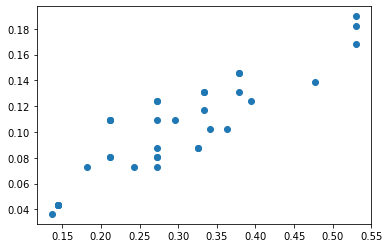

In [15]:
import matplotlib.pyplot as plt
plt.scatter(bp,hp)
plt.show()

In [16]:
mind = 1000
mh = 0
mb = 0
for i in range(len(hp)):
    ans = hp[i]**2 + (1-bp[i])**2
    if(ans < mind):
       mind = ans
       mh = hp[i]
       mb = bp[i]

print(mh,mb,mind)

0.1678832116788321 0.5303030303030303 0.24880001610611563


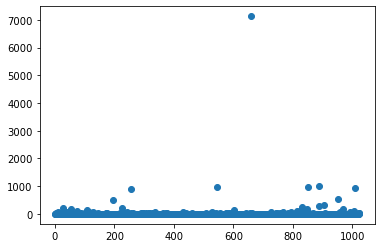

In [14]:
x = [i for i in range(len(countli))]
plt.scatter(x,countli)
plt.show() 

## 机器人的commit数

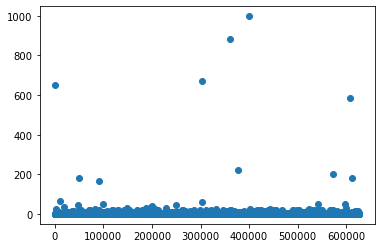

In [19]:
x = [i for i in range(len(countli2))]
plt.scatter(x,countli2)
plt.show() 

In [33]:
print(sum(countli)/len(countli))

21.231060606060606


In [36]:
print(max(bojdis))

0.9963985594237698


In [37]:
print(max(boldis))

0.8487990716758957


In [22]:
fime = []
mind = 100

for human in huli:
    jcdis = 0.0
    lcdis = 0.0
    count = 0
    mess = []
    for i in range(int(len(humanli)/100)):
        if(human == str(humanli[i])):
            mess.append(humancomm[i])

    if(len(mess)>10):
        for m in range(len(mess)):
            for n in range(m+1,len(mess)):
                sen1 = mess[m]
                sen2 = mess[n]
                if(sen1 and sen2):
                    count += 1
                    jcdis += jeccard(sen1,sen2)
                    lcdis += levendis(sen1,sen2)
        if(jcdis < mind):
            mind = jcdis
            minid = human
            fime = mess
    

In [24]:
minid

'18111003660'

In [23]:
fime

["'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'",
 "'autoCommit'"]

In [25]:
bodisli = []

for i in range(len(bojdis)):
    bodisli.append((bojdis[i] + boldis[i])/2)

In [27]:
len(countli),len(bodisli)

(1024, 132)

In [33]:
countlibo = []
for i in range(len(countli)):
    if(countli[i] > 10):
        countlibo.append(countli[i])

In [34]:
len(countlibo)

132

In [37]:
repoid = []
accid = []

with o.execute_sql('select distinct repo_id,push_commits_name from ods_github_log where pt >= \'20210101\' and pt <= \'20211201\' limit 1000000').open_reader(tunnel = True) as reader:
    for record in reader:
        repoid.append(record[0])
        accid.append(record[1])

In [58]:
import re

botname = []
botcount = []

for i in range(len(repoid)):
    thisrepobot = []
    for j in range(len(accid[i])):
        if(re.search('bot',str(accid[i][j]))):
            if(accid[i][j] not in thisrepobot):
                thisrepobot.append(accid[i][j])
                if(accid[i][j] not in botname):
                    botname.append(accid[i][j])
                    botcount.append(1)
                else:
                    inde = botname.index(accid[i][j])
                    botcount[inde] +=1


## 机器人参与的仓库数

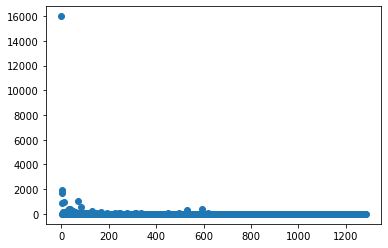

In [59]:
cou = [i for i in range(len(botcount))]

plt.scatter(cou,botcount)
plt.show()

In [60]:
i2 = botcount.index(max(botcount))
bot2 = botcount.pop(i2)

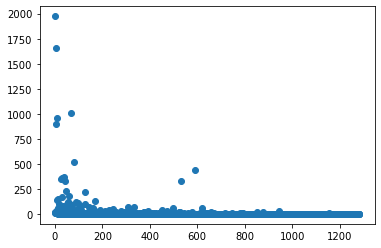

In [61]:
cou = [i for i in range(len(botcount))]

plt.scatter(cou,botcount)
plt.show()

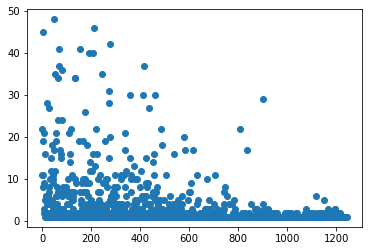

In [64]:
b2 = []

for i in range(len(botcount)):
    if(botcount[i] < 50):
        b2.append(botcount[i])

cou = [i for i in range(len(b2))]

plt.scatter(cou,b2)
plt.show()

## 后续通过临界点对message进行分类，根据结果去判断是否为bot

In [17]:
chooseid = []
choosemes = []

with o.execute_sql('select distinct push_commits_name,push_commits_message from ods_github_log where pt >= \'20200101\' and pt <= \'20201201\' limit 1000000').open_reader(tunnel = True) as reader:
    for record in reader:
        chooseid.append(record[0])
        choosemes.append(record[1])

In [18]:
idlist = []
meslist = []

for i in range(len(chooseid)):
    for j in range(len(chooseid[i])):
        idlist.append(chooseid[i][j])
        meslist.append(choosemes[i][j])

In [19]:
idset = set(idlist)

In [20]:
len(idlist)

1922846

In [21]:
thinkbot = []
thinkhuman = []


for idname in idset:
    jcdis = 0.0
    lcdis = 0.0
    count = 0
    mess = []
    for i in range(int(len(idlist)/100)):
        if(idname == str(idlist[i])):
            mess.append(meslist[i])

    if(len(mess)>10):
        for m in range(len(mess)):
            for n in range(m+1,len(mess)):
                sen1 = mess[m]
                sen2 = mess[n]
                if(sen1 and sen2):
                    count += 1
                    jcdis += jeccard(sen1,sen2)
                    lcdis += levendis(sen1,sen2)
        if(jcdis/count < 0.8 and lcdis/count < 0.7):
            thinkbot.append(idname)
        else:
            thinkhuman.append(idname)

In [22]:
thinkbot

['',
 '223131',
 '(BOT) Akihiro Urushihara',
 '73katoshota',
 '9oelM',
 '@dhis2-bot',
 'dependabot[bot]',
 'dependabot-preview[bot]',
 'lwhsu',
 '2649019045',
 '8',
 '5JM',
 'sdk-team',
 '542869246@qq.com',
 '389093982',
 '137478244@qq.com',
 '19394',
 '2049honeypot',
 '0xBahamoot',
 '+',
 '25037',
 '7Loopy',
 'GiteaBot',
 'FreddySig',
 'Minjae Lee',
 '1846689910']

In [23]:
thinkhuman

['0xflotus',
 '0xf8f8ff',
 '1346',
 '42',
 'KhacTrieu',
 '4libutt',
 '201411096',
 'A Holt',
 '0918nobita',
 '=',
 '123',
 'jamespetts',
 '100pah',
 'dapplion',
 'DGJackson',
 '21w',
 '-k',
 '/alex/',
 '2ndyrGroupA',
 'Renovate Bot',
 '503292',
 'A-Salty-Fish',
 '4thel00z',
 '10yeony',
 'A',
 '0xd4d',
 '4zk',
 '1ncontinentia',
 '3541',
 '27-Inoue-Yuki',
 '10sr',
 '--add',
 '5john',
 'A248',
 '@slovacus',
 '1Consumption',
 'Yair Morgenstern',
 '9Kbits',
 '@douglasabnovato',
 '030',
 '5maciek',
 '@qiwibot',
 '499895280@qq.com',
 'Vu Pham',
 'jmoenig',
 '0xmerman',
 '6543',
 '0xd34df00d',
 '李孟',
 '9by1q4wjhrcld2r4',
 '747-4EVER',
 'A11riseforme',
 '周始昊',
 '106360130',
 '21700340JuwonBaek',
 '--Explosion--',
 '\u202d哇哈哈',
 'Stephen Barlow',
 '2jiwon',
 'A. Unique TensorFlower',
 '-',
 '3d-gussner',
 '(K12 _ HCM) Trinh Tuan Tung',
 'Istio Automation',
 '839',
 '5675sp',
 '781610166',
 '1',
 'Paul Rosen',
 '3cidev',
 '598403',
 '80prozent',
 'AA',
 '0xakk0r0kamui',
 'ABDULAZIZ94',
 'AAAlex-1

In [11]:
f=open("thinkbot.txt","w")
f.write(str(thinkbot))
f.close()

In [13]:
f=open("thinkhuman.txt","w",encoding='utf-8')
f.write(str(thinkhuman))
f.close()

## 对第二类机器人情况的判别

In [17]:
chooseid2 = []
choosemes2 = []

with o.execute_sql('select distinct push_commits_name,push_commits_message from ods_github_log where pt >= \'20200101\' and pt <= \'20201201\' limit 5000000').open_reader(tunnel = True) as reader:
    for record in reader:
        chooseid2.append(record[0])
        choosemes2.append(record[1])

In [18]:
idlist2 = []
meslist2 = []

for i in range(len(chooseid2)):
    for j in range(len(chooseid2[i])):
        idlist2.append(chooseid2[i][j])
        meslist2.append(choosemes2[i][j])

In [19]:
idset2 = set(idlist2)

In [20]:
getrep = []
getid = []
ofid = []
oid = []

for i in range(len(choosemes2)):
    if(len(choosemes2[i]) > 1):
        thismeid = []
        for j in range(len(choosemes2[i])):
            for k in range(j+1,len(choosemes2[i])):
                me1 = choosemes2[i][j]
                me2 = choosemes2[i][k]
                if(me1 and me2):
                    jem = jeccard(me1,me2)
                    lem = levendis(me1,me2)
                    if(jem == 0 and lem == 0):
                        id1 = chooseid2[i][j]
                        id2 = chooseid2[i][k]
                        if(id1 != id2):
                            for p in range(len(getrep)):
                                if(id1 in getrep[p]):
                                    oid.append(id1)
                                    ofid.append([id1,me1])
                                if(id2 in getrep[p]):
                                    oid.append(id2)
                                    ofid.append([id2,me2])                                                   
                            if(id1 not in thismeid):
                                thismeid.append(id1)
                            if(id2 not in thismeid):
                                thismeid.append(id2)
                            list2 = [id1,id2,me1]
                            getid.append(list2)
        if(thismeid):
            getrep.append(thismeid)
                   


In [21]:
oid2 = set(oid)

In [22]:
messall = []

for id in oid2:
    messlist = [id]
    for i in range(len(ofid)):
        if(ofid[i][0] == id):
            messlist.append(ofid[i][1])
    messall.append(messlist)

In [23]:
jcd = []
led = []

for i in range(len(messall)):
    if(len(messall[i])==2):
        jcd.append(0)
        led.append(0)
    else:
        count = 0
        jcdis = 0
        lcdis = 0
        for m in range(1,len(messall[i])):
                for n in range(m+1,len(messall[i])):
                    sen1 = messall[i][m]
                    sen2 = messall[i][n]
                    if(sen1 and sen2):
                        count += 1
                        jcdis += jeccard(sen1,sen2)
                        lcdis += levendis(sen1,sen2)
        jcd.append(jcdis/count)
        led.append(lcdis/count)
                    

In [24]:
len(jcd)

2727

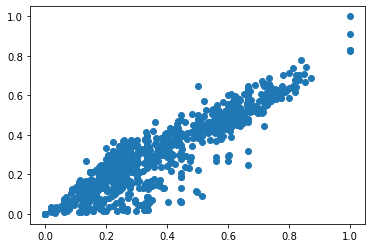

In [25]:
import matplotlib.pyplot as plt

plt.scatter(jcd,led)
plt.show()

In [29]:
indexlist = []

for i in range(len(jcd)):
    if(jcd[i]>0.7 and led[i]>0.7):
        indexlist.append(i)

In [30]:
indexlist

[102, 645, 982, 1079, 1217, 1291, 1398, 1478, 2052, 2432, 2589, 2701, 2706]

In [34]:
namneli = []

for i in indexlist:
    #if(len(messall[i])>5):
        namneli.append(messall[i])
        print(messall[i][0])

Brian Ross
Thomas Schouten
Animashaun Taofiq T
testcafe-build-bot
Andrey
amanda
urho3d-travis-ci
Adam Smith
Admin
Al Viro
Adam Soliev
Brandon
root


In [35]:
f=open("findname.txt","w",encoding='utf-8')
for line in namneli:  
    f.write(str(line)+'\n')
f.close()

## 确定为机器人： urho3d-travis-ci,testcafe-build-bot，root
## 确定为human:   Animashaun Taofiq T，amanda，Al Viro，Adam Soliev，Brandon
## 找寻不到的用户: Andrey，Admin
## 不确定用户（难以判断，比如有多个匹配用户或非活跃用户等）：Brian Ross，Thomas Schouten，Adam Smith

## 确定为human的特点：基本都是非常活跃的用户，所以会产生噪音使得该方法中可能会识别为robot

In [12]:
for id in set(ofid):
    if(id in thinkbot2):
        print(id)

In [25]:
f=open("findrepeat.txt","w",encoding='utf-8')
for line in getid:  
    f.write(str(line)+'\n')
f.close()